# Machines Manufacturing Capital Budgeting Model (Project 1)
This is a capital budgeting model used to calculate the cashflows and npv of a business in order to determine its profitability.

- [**Setup**](#Setup): Runs any imports and other setup
- [**Inputs**](#Inputs): Defines the inputs for the model
- [**Assumptions**](#Assumptions): Describes the assumptions that will drive our model
- [**Demand**](#Demand): calculating the demand for the next given years
- [**Machines**](#Machines) : calculating the amount of machines owned per year
- [**Supply**](#supply): calculating the supply per year
- [**Inflows**](#Inflows): calculating the inflows of cash per year
- [**outflows**](#outflows): calculating the outflows of cash per year
- [**cashflows**](#cashflows): calculating the cashflows
- [**npv**](#npv): calculating the npv




## Setup

Setup for the later calculations are here. The necessary packages are imported.

In [1]:
from dataclasses import dataclass
import numpy as np
import numpy_financial as npf
from sensitivity import SensitivityAnalyzer
import pandas as pd

## Inputs

All of the inputs for the model are defined here. A class is constructed to manage the data, and an instance of the class containing the default inputs is created.

In [2]:
@dataclass
class ModelInputs:
    n_phones: float = 100000
    price_scrap: float = 50000
    price_phone: float = 500
    cost_machine_adv: float = 1000000
    cogs_phone: float = 250
    n_life: int = 10
    n_machines: int = 5
    d_1: float = 100000
    g_d: float = 0.2
    max_year: float = 20
    interest: float = 0.05
        
    # Inputs for bonus problem
    elasticity: float = 100
    demand_constant: float = 300000
        
data = ModelInputs()
model_data= data
model_data


ModelInputs(n_phones=100000, price_scrap=50000, price_phone=500, cost_machine_adv=1000000, cogs_phone=250, n_life=10, n_machines=5, d_1=100000, g_d=0.2, max_year=20, interest=0.05, elasticity=100, demand_constant=300000)

In [6]:
cash_flows = # this should ultimately be set to the list containing your cash flow numbers in each year
npv = # this should ultimately be set to the overally model npv number 

SyntaxError: invalid syntax (2760237429.py, line 1)

We were asked to construct a model which will help determine how many machines to invest in and how much to spend on marketing. Our goal here is to end up with a cashflow which will help us find the npv for the investment. In order to do so we will successively build "small" functions that will help us build our cashflows like so :
$$C_F = I_F + O_F$$

Where: 
- $C_F$ : Cash Flow
- $I_F$ : Inflow
- $O_F$ : Outflow

## Assumptions 


Before starting the model, we will formulate and clarify the initial assumptions that will help us drive the model forward.  


We were given the following informations: 

-"In the first year , you must buy a machine."


-"Any other machine purchases must be made one after another."


-"Advertising can only begin after machine buying is done."

We can therefore assume the following :


-The first n_machines years (here 5) of the model will be dedicated to buying the machines.

-The demand will remain the same (here d_1) until n_machines (here 5) have been bought.

-The advertising will begin at year n_machine + 1 (year 6)

## Demand

The first step will be to determine how the demand will evolve along the years. Indeed, we were given an initial demand that will be increased by a given growth rate starting from year 6. when all the machines have been bought.

The formula for demand per year will be as follow :

If year is inferior or equal to 5 :

-$d_t = d_1$

If the current year is superior to 5 : 

-$d_t = d_t-1 + (d_t-1 * g_d)$

where:

-$d_1$: Initial Demand 

-$d_t$: Demand for the year $t$

-$d_t-1$ : Demand for the previous year 

-$g_d$: Growth rate

In Python format:

In [3]:
def calculate_demand(data: ModelInputs):
    # Calculate demand for each year from year 1 to max_year
    demand = [0]
    for year in range(data.max_year):
        if year < data.n_machines:
            demand.append(data.d_1)
        else:
            previous_demand = demand[-1]
            new_demand = previous_demand * (1 + data.g_d)
            demand.append(new_demand)
    return demand

demand = calculate_demand(data)
# Print the demand list
print("Demand over years: ", demand)


Demand over years:  [0, 100000, 100000, 100000, 100000, 100000, 120000.0, 144000.0, 172800.0, 207360.0, 248832.0, 298598.39999999997, 358318.07999999996, 429981.69599999994, 515978.0351999999, 619173.6422399998, 743008.3706879998, 891610.0448255996, 1069932.0537907195, 1283918.4645488632, 1540702.1574586357]


In [ ]:
demand[0]

## Machines

The next step will be to determine the amount of machines owned each year as it will allow us to later determine the available supply for each year.
Our function needs to take into account the acquisition of the machine during the first 5 years as well as the machines getting scrapped one by one from year 10.

The formula will be as follow:
 If year is inferior or equal to 5:
- $n_machines_t$ = 1 * year ( as in 1 per year)

  If year is inferior to 11 but superior to 5:
 - $n_machines_t$ = 5

 If year is superior or equal to 10 and inferior or to 15:
 - $n_machines_t$ = $n_machines_t-1$ - 1

 If year is superior to 15 and inferior or equal to 20:
 - $n_machines_t$ = 0

  where :
  
  
  $n_machines_t$ = number of machines at year
 
  
  $n_machines_t-1$ = number of machines at previous year 

In [5]:
def calculate_machines(data):
    machines= []
    for year in range(data.max_year+1):
        if year <= data.n_machines:
            machines.append(year)
        elif data.n_life + 1 > year > data.n_machines:
            machines.append(data.n_machines)
        elif  data.n_life + data.n_machines > year >= data.n_life :
            machines.append(machines[-1] - 1)
        else : machines.append(0)
    return machines 

# Create an instance of ModelInputs
inputs = ModelInputs()

# Calculate machines
machines = calculate_machines(data)
#print machine list 

print(machines)
machines[1]


[0, 1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0]


1

## supply 

The next step will be to calculate the available supply for each year. The function will need to take into account the acquisition of a new machine each year for the first five years as well as the machines getting scrapped one by one after year 10.


The formula is as follow :
$supply_t$ = $n_  Machines_t$ * $n_ Phones$

where :
- $supply_t$ = Supply at year t
 
-  $n_machines_t$ = Numbers of machines at year t

-  $n_phones$ = Amount of phones per machines

In [6]:
def calculate_supply (data):
    supply = []
    for machine in machines:
        supply.append(machine * data.n_phones)
    return supply
        
supply = calculate_supply (data)
supply

[0,
 100000,
 200000,
 300000,
 400000,
 500000,
 500000,
 500000,
 500000,
 500000,
 500000,
 400000,
 300000,
 200000,
 100000,
 0,
 0,
 0,
 0,
 0,
 0]

In [7]:
supply[1]

100000

## Inflows

Here, we are getting closer to calculating the final cashflow, the first step will be the calculation of our inflow.


The inflow can be defined as the amount of cash coming in each year.  

Before calculating the inflow we will need to automate the amount of cash generated by reselling our machines so it will make calculating our inflow easier.

In [8]:
def scrap_value_per_year (data):
    scrap=[]
    for year in range(data.max_year+1):
         if data.n_life + data.n_machines>=year >= data.n_life + 1:
            scrap.append(data.price_scrap)
         else: scrap.append(0)
    return scrap

scrap = scrap_value_per_year(data)

            ## sells will occur between year 11 and year 15
            ##data.n_life = year 10
            ##data.n_life + data.n_machines = year 15

In [9]:
scrap[15]

50000

Now that we have calculated the scrap value for each year , we can proceed with our inflows calculations. 

The formula will be as follow:

if  year ≤ 5:

$Inflow_t$ = $d.1$ * $n.Phones$

if year > 5:

the formula used will depend on the demand and supply 

if demand > supply


$$ Inflow_t = d_t* n.phones + s.income_t $$

if demand < supply 

$$Inflow_t = supply_t * n.phones + s.income_t $$ 

$Inflow_t$ = Inflows at year t
 
 $d.1$ = Initial Demand

 $n.phones$ = Price per phone
 
 $s.value$ = Scrap income at year

 



In [10]:
demand[10]

248832.0

In [11]:
def inflow_per_year(data: ModelInputs):
    inflow = [0]
    demand = calculate_demand(data)
    supply = calculate_supply(data)
    scrap = scrap_value_per_year(data)

    for year in range(1,data.max_year+1):
        if year < data.n_machines:
            total_inflow = demand[year] * data.price_phone
        else:
            if year < len(demand) and year < len(supply) and year < len(scrap):
                if demand[year] <= supply[year]:
                    total_inflow = demand[year] * data.price_phone + scrap[year]
                else:
                    total_inflow = supply[year] * data.price_phone + scrap[year]
            else:
                total_inflow = 0  # Handle edge case if lists are unexpectedly short
        
        inflow.append(total_inflow)

    return inflow


inflow=inflow_per_year(data)
inflow

[0,
 50000000,
 50000000,
 50000000,
 50000000,
 50000000,
 60000000.0,
 72000000.0,
 86400000.0,
 103680000.0,
 124416000.0,
 149349199.99999997,
 150050000,
 100050000,
 50050000,
 50000,
 0,
 0,
 0,
 0,
 0]

## outflows

Outflow is the last element we need to be able to calculate in order to arrive at our final cashflows. 

Outflow can be defined as the amount of cash spent each year. 

if year ≤ 5:
- $$Outflow_t = cost_phones * d_1 + cost_adv$$ 


if year > 5:

when demand > supply 

$$Outflow_t = cost_phones * d_t + cost_adv$$

when demand < supply 

$$outflow_t = cost_phones * supply_t + cost_adv$$



where: 


-$$outflow_t$$  =  outflow per year 


-$$cost_phones$$ = cost of phone production


-$$supply_t$$ = supply per year 



-$$cost_adv$$ = cost of advertisement 


-$$d_1$$ = Initial Demand



In [12]:

def outflow_per_year(data: ModelInputs):
    outflow = [0]
    
    supply = calculate_supply(data)
    demand = calculate_demand(data)  # Assuming you have a function to calculate demand
    scrap = scrap_value_per_year(data)    # Assuming you have a function to calculate scrap

    for year in range(1,data.max_year+1):
        if year < data.n_machines:
            total_outflow = data.cogs_phone * data.d_1 + data.cost_machine_adv
        else:
            if year < len(demand) and year < len(supply) and year < len(scrap):
                if demand[year] < supply[year]:
                    total_outflow = data.cogs_phone * demand[year] + data.cost_machine_adv
                else:
                    total_outflow = data.cogs_phone * supply[year] + data.cost_machine_adv
            else:
                total_outflow = 0
        
        outflow.append(total_outflow)
    
    return outflow

# Example usage
data = ModelInputs()  # Ensure this is correctly instantiated with all required attributes
outflow = outflow_per_year(data)
print("Outflow over years:", outflow)

Outflow over years: [0, 26000000, 26000000, 26000000, 26000000, 26000000, 31000000.0, 37000000.0, 44200000.0, 52840000.0, 63208000.0, 75649599.99999999, 76000000, 51000000, 26000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000]


# cashflows

In [13]:
def cashflow_per_year(data):
    cashflow=[]
    inflow = inflow_per_year(data)
    outflow = outflow_per_year(data)
    for year in range (0, data.max_year+1):
        cashflow.append (inflow[year] - outflow[year])
    return cashflow

cashflow = cashflow_per_year(data)

cashflow

[0,
 24000000,
 24000000,
 24000000,
 24000000,
 24000000,
 29000000.0,
 35000000.0,
 42200000.0,
 50840000.0,
 61208000.0,
 73699599.99999999,
 74050000,
 49050000,
 24050000,
 -950000,
 -1000000,
 -1000000,
 -1000000,
 -1000000,
 -1000000]

## npv

In [14]:

def model_npv(data: ModelInputs):
    cashflow= cashflow_per_year(data)
    npv = npf.npv(data.interest, cashflow)
    return npv

# Create an instance of ModelInputs

# Calculate NPV
npv_result = model_npv(data)
print(f"the npv is {npv_result:,.2f}")

the npv is 369,276,542.47


The npv here is positive so we can conclude that a profit will be made on those investments despite the negative cash flows during the last few years

## Sensitivity Analysis

Sensitivity Analysis is a tool used in financial modeling to analyze how the different values of a set of independent variables affect a specific dependent variable under certain specific conditions. Here we will analyze how 

In [15]:
def model_npv_seperate_args(**kwargs):
    data = ModelInputs(**kwargs)
    
    # Recalculate each component with the new data
    demand = calculate_demand(data)
    supply = calculate_supply(data)
    scrap = scrap_value_per_year(data)
    inflow = inflow_per_year(data)
    outflow = outflow_per_year(data)
    cashflow = cashflow_per_year(data)
    
    npv = npf.npv(data.interest, cashflow)
    return npv

model_npv_seperate_args(d_1=50000)

202104208.459642

In [19]:
initial_npv = model_npv_seperate_args(d_1=100000)
print(f"NPV with d_1=100000: {initial_npv}")

# Test with a different d_1 value
different_npv = model_npv_seperate_args(d_1=300000)
print(f"NPV with d_1=300000: {different_npv}")

NPV with d_1=100000: 369276542.47415346
NPV with d_1=300000: 837588098.5640895


In [16]:
sensitivity_values ={
    'n_machines': [1,2,3,4,5],
     'd_1': [10000,100000,200000,300000]
}

sa = SensitivityAnalyzer(sensitivity_values, 
                         model_npv_seperate_args)


    

  0%|          | 0/20 [00:00<?, ?it/s]C:\Users\tcham\anaconda3\Lib\site-packages\sensitivity\df.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,pd.DataFrame(pd.Series(base_param_dict)).T])
100%|██████████| 20/20 [00:00<00:00, 711.97it/s]


In [17]:
sa.df

,n_machines,d_1,Result
0,1,10000,78095024.4243
1,1,100000,591353085.381057
2,1,200000,834211809.366802
3,1,300000,865132643.480309
4,2,10000,64167534.042821
5,2,100000,519990656.109969
6,2,200000,806408315.709826
7,2,300000,912779532.970266
8,3,10000,52206693.031537
9,3,100000,462261000.807992


C:\Users\tcham\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\tcham\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


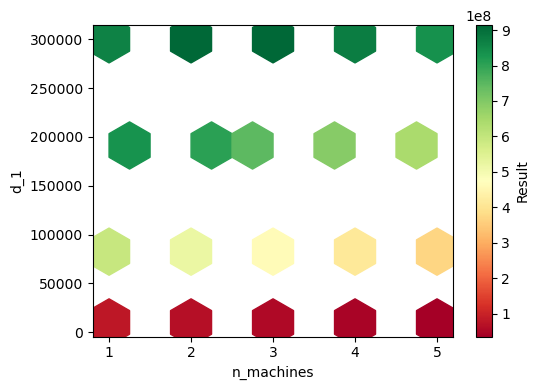

In [18]:
plot = sa.plot()

NameError: name 'sa' is not defined

# scenario analysis 

In [19]:
bad_economy_data = ModelInputs(
        d_1=50000,
        price_phone=250,
    )

good_economy_data = ModelInputs(
        d_1=200000,
        price_phone=1000,
    )

cases = { 
    'Bad': bad_economy_data,
    'Normal': model_data,
    'Good': good_economy_data,
}




In [20]:
for case_type, case_inputs in cases.items():
    npv = model_npv(case_inputs)
    print(f'in a {case_type} economy , the npv is ${npv:,.0f}.')
    
    

in a Bad economy , the npv is $-12,329,314.
in a Normal economy , the npv is $369,276,542.
in a Good economy , the npv is $1,948,116,444.


In [21]:
probabilities = {
    'Bad': 0.5,
    'Normal': 0.3,
    'Good': 0.2,
}

expected_npv = 0
for case_type, case_inputs in cases.items():
    npv = model_npv(case_inputs)
    weighted_npv = npv * probabilities[case_type]
    expected_npv += weighted_npv

print(f'The project would earn an expected NPV of ${expected_npv:,.0f} with a recession chance of {probabilities["Bad"]:.0%} and an expansion chance of {probabilities["Good"]:.0%}')
    

The project would earn an expected NPV of $494,241,594 with a recession chance of 50% and an expansion chance of 20%
